<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(0_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n20.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,75.227962,93.828178,81.032397,44.036928,3.631570,307.757035,304.025815,3.731221
1,0.0,1.0,37.784476,85.753409,80.484406,98.817177,2.351353,315.190822,312.978622,2.212200
2,0.0,2.0,93.271998,78.911735,78.630638,66.769966,-3.284876,324.299461,327.410524,-3.111063
3,0.0,3.0,77.965175,92.564477,29.731410,27.831813,-0.962395,237.130480,238.297775,-1.167295
4,0.0,4.0,81.021787,79.000615,53.359350,70.398998,-0.092611,293.688139,293.839430,-0.151290
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.298963,64.298577,87.233767,71.641024,-0.976923,327.495408,328.588569,-1.093160
249996,999.0,246.0,41.448416,24.851381,52.542667,46.841156,1.011574,176.695194,175.626522,1.068672
249997,999.0,247.0,25.531625,30.314829,31.932522,34.956156,0.731834,133.466967,132.507696,0.959270
249998,999.0,248.0,30.981507,21.862527,25.858448,40.826045,-2.573934,126.954593,129.373935,-2.419342


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,75.227962,93.828178,81.032397,44.036928,3.631570,307.757035,304.025815,3.731221
1,0.0,1.0,37.784476,85.753409,80.484406,98.817177,2.351353,315.190822,312.978622,2.212200
2,0.0,2.0,93.271998,78.911735,78.630638,66.769966,-3.284876,324.299461,327.410524,-3.111063
3,0.0,3.0,77.965175,92.564477,29.731410,27.831813,-0.962395,237.130480,238.297775,-1.167295
4,0.0,4.0,81.021787,79.000615,53.359350,70.398998,-0.092611,293.688139,293.839430,-0.151290
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.298963,64.298577,87.233767,71.641024,-0.976923,327.495408,328.588569,-1.093160
249996,999.0,246.0,41.448416,24.851381,52.542667,46.841156,1.011574,176.695194,175.626522,1.068672
249997,999.0,247.0,25.531625,30.314829,31.932522,34.956156,0.731834,133.466967,132.507696,0.959270
249998,999.0,248.0,30.981507,21.862527,25.858448,40.826045,-2.573934,126.954593,129.373935,-2.419342


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    75.227962  93.828178  81.032397  44.036928  3.631570  307.757035   
      1.0    37.784476  85.753409  80.484406  98.817177  2.351353  315.190822   
      2.0    93.271998  78.911735  78.630638  66.769966 -3.284876  324.299461   
      3.0    77.965175  92.564477  29.731410  27.831813 -0.962395  237.130480   
      4.0    81.021787  79.000615  53.359350  70.398998 -0.092611  293.688139   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  95.298963  64.298577  87.233767  71.641024 -0.976923  327.495408   
      246.0  41.448416  24.851381  52.542667  46.841156  1.011574  176.695194   
      247.0  25.531625  30.314829  31.932522  34.956156  0.731834  133.466967   
      248.0  30.981507  21.862527  25.858448  40.826045 -2.573934  126.954593   
      249.0  90.187052  73.892625  57.711375  31.391451 -2.273530  260.908973   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    304.025815  3.731221  
      1.0    312.978622  2.212200  
      2.0    327.410524 -3.111063  
      3.0    238.297775 -1.167295  
      4.0    293.839430 -0.151290  
...                 ...       ...  
999.0 245.0  328.588569 -1.093160  
      246.0  175.626522  1.068672  
      247.0  132.507696  0.959270  
      248.0  129.373935 -2.419342  
      249.0  262.993827 -2.084854  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    75.227962  93.828178  81.032397  44.036928  3.631570  307.757035   
      1.0    37.784476  85.753409  80.484406  98.817177  2.351353  315.190822   
      2.0    93.271998  78.911735  78.630638  66.769966 -3.284876  324.299461   
      3.0    77.965175  92.564477  29.731410  27.831813 -0.962395  237.130480   
      4.0    81.021787  79.000615  53.359350  70.398998 -0.092611  293.688139   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  95.298963  64.298577  87.233767  71.641024 -0.976923  327.495408   
      246.0  41.448416  24.851381  52.542667  46.841156  1.011574  176.695194   
      247.0  25.531625  30.314829  31.932522  34.956156  0.731834  133.466967   
      248.0  30.981507  21.862527  25.858448  40.826045 -2.573934  126.954593   
      249.0  90.187052  73.892625  57.711375  31.391451 -2.273530  260.908973   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    304.025815  3.731221  
      1.0    312.978622  2.212200  
      2.0    327.410524 -3.111063  
      3.0    238.297775 -1.167295  
      4.0    293.839430 -0.151290  
...                 ...       ...  
999.0 245.0  328.588569 -1.093160  
      246.0  175.626522  1.068672  
      247.0  132.507696  0.959270  
      248.0  129.373935 -2.419342  
      249.0  262.993827 -2.084854  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,75.227962,93.828178,81.032397,44.036928,3.631570,307.757035,304.025815,3.731221
1,0.0,1.0,37.784476,85.753409,80.484406,98.817177,2.351353,315.190822,312.978622,2.212200
2,0.0,2.0,93.271998,78.911735,78.630638,66.769966,-3.284876,324.299461,327.410524,-3.111063
3,0.0,3.0,77.965175,92.564477,29.731410,27.831813,-0.962395,237.130480,238.297775,-1.167295
4,0.0,4.0,81.021787,79.000615,53.359350,70.398998,-0.092611,293.688139,293.839430,-0.151290
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.298963,64.298577,87.233767,71.641024,-0.976923,327.495408,328.588569,-1.093160
249996,999.0,246.0,41.448416,24.851381,52.542667,46.841156,1.011574,176.695194,175.626522,1.068672
249997,999.0,247.0,25.531625,30.314829,31.932522,34.956156,0.731834,133.466967,132.507696,0.959270
249998,999.0,248.0,30.981507,21.862527,25.858448,40.826045,-2.573934,126.954593,129.373935,-2.419342


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    75.227962  93.828178  81.032397  44.036928  3.631570  307.757035   
      1.0    37.784476  85.753409  80.484406  98.817177  2.351353  315.190822   
      2.0    93.271998  78.911735  78.630638  66.769966 -3.284876  324.299461   
      3.0    77.965175  92.564477  29.731410  27.831813 -0.962395  237.130480   
      4.0    81.021787  79.000615  53.359350  70.398998 -0.092611  293.688139   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  95.298963  64.298577  87.233767  71.641024 -0.976923  327.495408   
      246.0  41.448416  24.851381  52.542667  46.841156  1.011574  176.695194   
      247.0  25.531625  30.314829  31.932522  34.956156  0.731834  133.466967   
      248.0  30.981507  21.862527  25.858448  40.826045 -2.573934  126.954593   
      249.0  90.187052  73.892625  57.711375  31.391451 -2.273530  260.908973   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    304.025815  3.731221  
      1.0    312.978622  2.212200  
      2.0    327.410524 -3.111063  
      3.0    238.297775 -1.167295  
      4.0    293.839430 -0.151290  
...                 ...       ...  
999.0 245.0  328.588569 -1.093160  
      246.0  175.626522  1.068672  
      247.0  132.507696  0.959270  
      248.0  129.373935 -2.419342  
      249.0  262.993827 -2.084854  

[250000 rows x 8 columns]

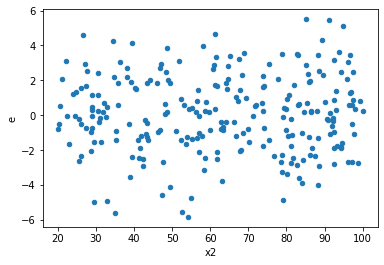

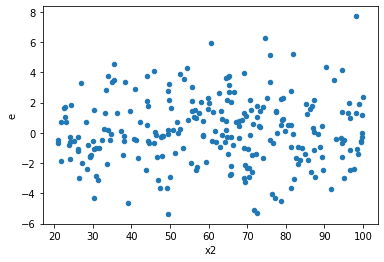

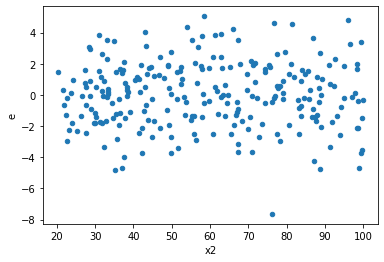

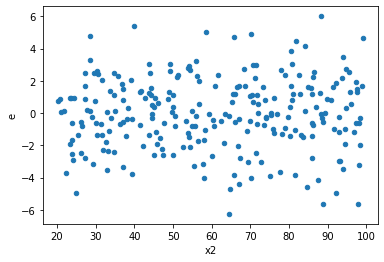

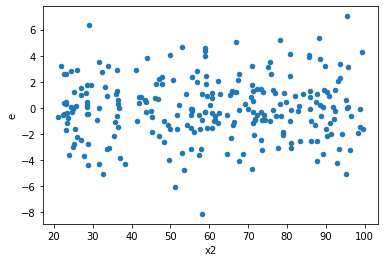

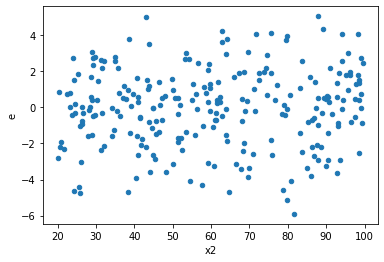

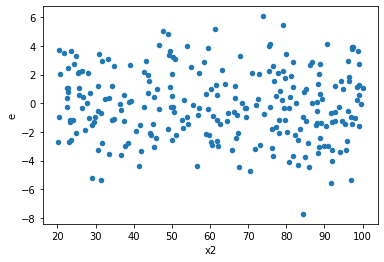

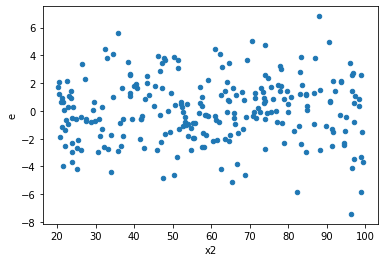

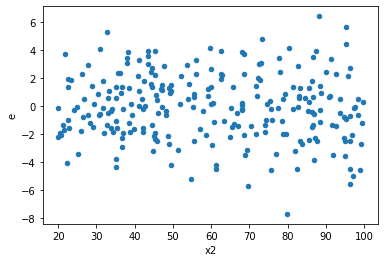

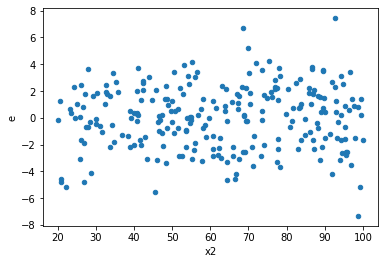

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,478.25027286165164,499.57012215941785,4.981773675642205,5.203855439160603,1.0445788544357686,0.8312497602148556,0.5843751198925722,0.4156248801074278,Reject001=1 : Homoscedasticity
1.0,96.0,96.0,412.6941483188874,560.0448790523359,4.298897378321744,5.833800823461832,1.3570458445647526,0.13650215034883928,0.9317489248255804,0.06825107517441964,Reject001=1 : Homoscedasticity
2.0,96.0,96.0,343.9414196386623,428.148777690972,3.5827231212360657,4.459883100947625,1.2448305241653541,0.28506077151052267,0.8574696142447387,0.14253038575526134,Reject001=1 : Homoscedasticity
3.0,96.0,96.0,361.85131286084123,542.7209535969783,3.7692845089670963,5.653343266635191,1.4998451969295326,0.04838242783590552,0.9758087860820472,0.02419121391795276,Reject001=1 : Homoscedasticity
5.0,96.0,96.0,367.2794267778238,515.29209715892,3.8258273622689978,5.367626012072083,1.4029974444243312,0.09881672245694695,0.9505916387715265,0.049408361228473474,Reject001=1 : Homoscedasticity
6.0,96.0,96.0,518.020157893812,634.5502097648917,5.396043311393875,6.609898018384289,1.2249527360959707,0.3218893941892351,0.8390553029053824,0.16094469709461756,Reject001=1 : Homoscedasticity
7.0,96.0,96.0,491.23126866777676,568.4314853727213,5.116992381956008,5.921161305965847,1.1571565607260959,0.47590261126741185,0.7620486943662941,0.23795130563370592,Reject001=1 : Homoscedasticity
8.0,96.0,96.0,399.7939005691505,682.2967989976808,4.164519797595317,7.107258322892508,1.7066213317070533,0.00941762186214512,0.9952911890689274,0.00470881093107256,Reject001=0 : Heteroscedasticity
9.0,96.0,96.0,435.82483646360316,540.3469493804616,4.539842046495866,5.628614056046476,1.239825967159142,0.2939969725987659,0.853001513700617,0.14699848629938295,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,478.25027286165164,499.57012215941785,4.981773675642205,5.203855439160603,1.0445788544357686,0.8312497602148556,Reject001=1 : Homoscedasticity
1.0,96.0,96.0,412.6941483188874,560.0448790523359,4.298897378321744,5.833800823461832,1.3570458445647526,0.13650215034883928,Reject001=1 : Homoscedasticity
2.0,96.0,96.0,343.9414196386623,428.148777690972,3.5827231212360657,4.459883100947625,1.2448305241653541,0.28506077151052267,Reject001=1 : Homoscedasticity
3.0,96.0,96.0,361.85131286084123,542.7209535969783,3.7692845089670963,5.653343266635191,1.4998451969295326,0.04838242783590552,Reject001=1 : Homoscedasticity
4.0,96.0,96.0,526.5894263436033,519.5933738139257,5.485306524412535,5.412430977228393,0.9867144075067077,0.9478942051191905,Reject001=1 : Homoscedasticity
5.0,96.0,96.0,367.2794267778238,515.29209715892,3.8258273622689978,5.367626012072083,1.4029974444243312,0.09881672245694695,Reject001=1 : Homoscedasticity
6.0,96.0,96.0,518.020157893812,634.5502097648917,5.396043311393875,6.609898018384289,1.2249527360959707,0.3218893941892351,Reject001=1 : Homoscedasticity
7.0,96.0,96.0,491.23126866777676,568.4314853727213,5.116992381956008,5.921161305965847,1.1571565607260959,0.47590261126741185,Reject001=1 : Homoscedasticity
8.0,96.0,96.0,399.7939005691505,682.2967989976808,4.164519797595317,7.107258322892508,1.7066213317070533,0.00941762186214512,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      818
Reject001=0 : Heteroscedasticity    182
Name: Result_test, dtype: int64